# Simple Document Classification using Multi Class Logistic Regression & SVM Soft Margin from scratch

## Anas AHOUZI

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from ML_Algos import logreg_multiclass, svm_multiclass
from Loss.loss import visualizer


data_path = '/Users/anasahouzi/PycharmProjects/IA/simple_doc/Data/trainingdata.txt'
f = open(data_path, 'r') 
train_data = f.readlines()

# Nbr of samples in training set
N = int(train_data.pop(0))

# Labels & training data
labels = [int(elt[0]) for elt in train_data]
documents = [elt[2:] for elt in train_data]

# Create a pandas Dataframe
df = pd.DataFrame(data={"Text": documents, "Category": labels})

df.head()

,Text,Category
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,am international inc am nd qtr jan oper shr lo...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


In [2]:
# Split the data into training & testing sets

X = df["Text"]
Y = df["Category"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [3]:
# Sklearn tfidf returns a csr_matrix data type (Compressed Sparse Row
# matrix), where it stores only values different from zero and their
# corresponding indices.
tfidf = TfidfVectorizer(min_df=0.005, max_df=0.7, stop_words={'english'})

# Convert the text to tfidf matrices
x_train_vect = tfidf.fit_transform(x_train).toarray()
x_test_vect = tfidf.transform(x_test).toarray()

# Dimension of feature space
F = len(x_train_vect[0])

# Inserting ones in the first column for bias estimation
x_train_vect = np.insert(x_train_vect, 0, 1, axis=1)
x_test_vect = np.insert(x_test_vect, 0, 1, axis=1)

print("Shape of the training set {}".format(x_train_vect.shape))
print("Shape of the testing set {}".format(x_test_vect.shape))


Shape of the training set (4388, 1566)
Shape of the testing set (1097, 1566)


## 1)- Multi Class Logistic Regression

In [8]:
#################### Defining the basic parameters for training the Logistic Regression model #######################

# Learning rate
alpha = 0.001
# Momentum parameter for the optimizer
beta = 0.9
# Number of samples in a mini-batch
mb = 100
# Number of classes
n_class = 8
# Number of Epochs
n_epochs = 60
# Show the evolution of training
info = 1

# Training the model
log_reg = logreg_multiclass.LogisticRegression(x_train_vect, y_train, x_test_vect, y_test,
                                               alpha, beta, mb, n_class, F, n_epochs, info)
lr_weights, lr_loss, lr_acc = log_reg.train()

-------------------------------------------------- Processing class 1 --------------------------------------------------

Epoch: 0 | Duration: 0.38s | Train loss: 0.43044 | Train accuracy: 89.01% | Validation loss: 0.4334 | Validation accuracy: 88.15%
Epoch: 1 | Duration: 0.26s | Train loss: 0.34721 | Train accuracy: 89.57% | Validation loss: 0.35685 | Validation accuracy: 88.38%
Epoch: 2 | Duration: 0.26s | Train loss: 0.30333 | Train accuracy: 90.4% | Validation loss: 0.31776 | Validation accuracy: 89.29%
Epoch: 3 | Duration: 0.26s | Train loss: 0.27397 | Train accuracy: 91.14% | Validation loss: 0.2919 | Validation accuracy: 89.75%
Epoch: 4 | Duration: 0.28s | Train loss: 0.25186 | Train accuracy: 92.02% | Validation loss: 0.27251 | Validation accuracy: 89.98%
Epoch: 5 | Duration: 0.26s | Train loss: 0.23414 | Train accuracy: 92.63% | Validation loss: 0.25696 | Validation accuracy: 90.43%
Epoch: 6 | Duration: 0.26s | Train loss: 0.21937 | Train accuracy: 93.04% | Validation loss: 0.

Epoch: 1 | Duration: 0.44s | Train loss: 0.38107 | Train accuracy: 75.61% | Validation loss: 0.39524 | Validation accuracy: 76.99%
Epoch: 2 | Duration: 0.26s | Train loss: 0.34031 | Train accuracy: 83.97% | Validation loss: 0.35985 | Validation accuracy: 84.97%
Epoch: 3 | Duration: 0.33s | Train loss: 0.30888 | Train accuracy: 88.96% | Validation loss: 0.33303 | Validation accuracy: 90.21%
Epoch: 4 | Duration: 0.28s | Train loss: 0.28334 | Train accuracy: 91.34% | Validation loss: 0.31136 | Validation accuracy: 91.57%
Epoch: 5 | Duration: 0.27s | Train loss: 0.26204 | Train accuracy: 93.04% | Validation loss: 0.29325 | Validation accuracy: 94.31%
Epoch: 6 | Duration: 0.31s | Train loss: 0.24395 | Train accuracy: 93.72% | Validation loss: 0.27781 | Validation accuracy: 95.22%
Epoch: 7 | Duration: 0.26s | Train loss: 0.22839 | Train accuracy: 94.38% | Validation loss: 0.26443 | Validation accuracy: 96.13%
Epoch: 8 | Duration: 0.26s | Train loss: 0.21487 | Train accuracy: 94.94% | Validat

Epoch: 3 | Duration: 0.32s | Train loss: 0.15102 | Train accuracy: 95.72% | Validation loss: 0.18167 | Validation accuracy: 93.62%
Epoch: 4 | Duration: 0.25s | Train loss: 0.14156 | Train accuracy: 95.72% | Validation loss: 0.17051 | Validation accuracy: 93.62%
Epoch: 5 | Duration: 0.25s | Train loss: 0.13301 | Train accuracy: 95.72% | Validation loss: 0.16037 | Validation accuracy: 93.62%
Epoch: 6 | Duration: 0.25s | Train loss: 0.12529 | Train accuracy: 95.72% | Validation loss: 0.15114 | Validation accuracy: 93.62%
Epoch: 7 | Duration: 0.25s | Train loss: 0.11833 | Train accuracy: 95.72% | Validation loss: 0.14275 | Validation accuracy: 93.62%
Epoch: 8 | Duration: 0.24s | Train loss: 0.11206 | Train accuracy: 95.72% | Validation loss: 0.13512 | Validation accuracy: 93.62%
Epoch: 9 | Duration: 0.25s | Train loss: 0.1064 | Train accuracy: 95.72% | Validation loss: 0.12817 | Validation accuracy: 93.62%
Epoch: 10 | Duration: 0.24s | Train loss: 0.10131 | Train accuracy: 95.75% | Validat

Epoch: 5 | Duration: 0.24s | Train loss: 0.11789 | Train accuracy: 98.02% | Validation loss: 0.09642 | Validation accuracy: 97.72%
Epoch: 6 | Duration: 0.25s | Train loss: 0.11529 | Train accuracy: 98.02% | Validation loss: 0.09475 | Validation accuracy: 97.72%
Epoch: 7 | Duration: 0.25s | Train loss: 0.11277 | Train accuracy: 98.02% | Validation loss: 0.09315 | Validation accuracy: 97.72%
Epoch: 8 | Duration: 0.25s | Train loss: 0.11033 | Train accuracy: 98.02% | Validation loss: 0.09161 | Validation accuracy: 97.72%
Epoch: 9 | Duration: 0.24s | Train loss: 0.10796 | Train accuracy: 98.02% | Validation loss: 0.09013 | Validation accuracy: 97.72%
Epoch: 10 | Duration: 0.25s | Train loss: 0.10568 | Train accuracy: 98.02% | Validation loss: 0.0887 | Validation accuracy: 97.72%
Epoch: 11 | Duration: 0.25s | Train loss: 0.10346 | Train accuracy: 98.02% | Validation loss: 0.08733 | Validation accuracy: 97.72%
Epoch: 12 | Duration: 0.25s | Train loss: 0.1013 | Train accuracy: 98.02% | Valida

Epoch: 7 | Duration: 0.25s | Train loss: 0.00771 | Train accuracy: 99.29% | Validation loss: 0.04881 | Validation accuracy: 99.09%
Epoch: 8 | Duration: 0.25s | Train loss: 0.00751 | Train accuracy: 99.29% | Validation loss: 0.04845 | Validation accuracy: 99.09%
Epoch: 9 | Duration: 0.25s | Train loss: 0.00736 | Train accuracy: 99.29% | Validation loss: 0.04809 | Validation accuracy: 99.09%
Epoch: 10 | Duration: 0.25s | Train loss: 0.00726 | Train accuracy: 99.29% | Validation loss: 0.04773 | Validation accuracy: 99.09%
Epoch: 11 | Duration: 0.25s | Train loss: 0.00718 | Train accuracy: 99.29% | Validation loss: 0.04737 | Validation accuracy: 99.09%
Epoch: 12 | Duration: 0.25s | Train loss: 0.00713 | Train accuracy: 99.29% | Validation loss: 0.047 | Validation accuracy: 99.09%
Epoch: 13 | Duration: 0.25s | Train loss: 0.00709 | Train accuracy: 99.29% | Validation loss: 0.04664 | Validation accuracy: 99.09%
Epoch: 14 | Duration: 0.25s | Train loss: 0.00706 | Train accuracy: 99.29% | Vali

Epoch: 9 | Duration: 0.25s | Train loss: 0.11877 | Train accuracy: 95.29% | Validation loss: 0.08687 | Validation accuracy: 96.81%
Epoch: 10 | Duration: 0.25s | Train loss: 0.1125 | Train accuracy: 95.29% | Validation loss: 0.08336 | Validation accuracy: 97.04%
Epoch: 11 | Duration: 0.24s | Train loss: 0.10677 | Train accuracy: 95.42% | Validation loss: 0.08012 | Validation accuracy: 97.27%
Epoch: 12 | Duration: 0.25s | Train loss: 0.10155 | Train accuracy: 95.49% | Validation loss: 0.07712 | Validation accuracy: 97.27%
Epoch: 13 | Duration: 0.26s | Train loss: 0.09677 | Train accuracy: 95.8% | Validation loss: 0.07435 | Validation accuracy: 97.49%
Epoch: 14 | Duration: 0.24s | Train loss: 0.0924 | Train accuracy: 96.1% | Validation loss: 0.07177 | Validation accuracy: 97.49%
Epoch: 15 | Duration: 0.24s | Train loss: 0.08839 | Train accuracy: 96.33% | Validation loss: 0.06938 | Validation accuracy: 97.72%
Epoch: 16 | Duration: 0.24s | Train loss: 0.08471 | Train accuracy: 96.4% | Valid

Epoch: 11 | Duration: 0.25s | Train loss: 0.10996 | Train accuracy: 96.71% | Validation loss: 0.11288 | Validation accuracy: 94.99%
Epoch: 12 | Duration: 0.24s | Train loss: 0.10551 | Train accuracy: 96.71% | Validation loss: 0.10866 | Validation accuracy: 95.22%
Epoch: 13 | Duration: 0.25s | Train loss: 0.10141 | Train accuracy: 96.76% | Validation loss: 0.10476 | Validation accuracy: 95.22%
Epoch: 14 | Duration: 0.25s | Train loss: 0.09764 | Train accuracy: 96.83% | Validation loss: 0.10115 | Validation accuracy: 95.44%
Epoch: 15 | Duration: 0.25s | Train loss: 0.09416 | Train accuracy: 96.99% | Validation loss: 0.09782 | Validation accuracy: 95.44%
Epoch: 16 | Duration: 0.24s | Train loss: 0.09096 | Train accuracy: 97.11% | Validation loss: 0.09473 | Validation accuracy: 95.67%
Epoch: 17 | Duration: 0.25s | Train loss: 0.08801 | Train accuracy: 97.32% | Validation loss: 0.09187 | Validation accuracy: 95.9%
Epoch: 18 | Duration: 0.24s | Train loss: 0.08529 | Train accuracy: 97.39% | 

Epoch: 13 | Duration: 0.24s | Train loss: 0.1144 | Train accuracy: 96.35% | Validation loss: 0.10171 | Validation accuracy: 95.9%
Epoch: 14 | Duration: 0.25s | Train loss: 0.11248 | Train accuracy: 96.35% | Validation loss: 0.09894 | Validation accuracy: 95.9%
Epoch: 15 | Duration: 0.24s | Train loss: 0.11069 | Train accuracy: 96.38% | Validation loss: 0.09635 | Validation accuracy: 95.9%
Epoch: 16 | Duration: 0.25s | Train loss: 0.10902 | Train accuracy: 96.4% | Validation loss: 0.09392 | Validation accuracy: 95.9%
Epoch: 17 | Duration: 0.25s | Train loss: 0.10745 | Train accuracy: 96.51% | Validation loss: 0.09164 | Validation accuracy: 96.13%
Epoch: 18 | Duration: 0.24s | Train loss: 0.10599 | Train accuracy: 96.86% | Validation loss: 0.0895 | Validation accuracy: 96.58%
Epoch: 19 | Duration: 0.24s | Train loss: 0.10462 | Train accuracy: 97.01% | Validation loss: 0.08749 | Validation accuracy: 96.58%
Epoch: 20 | Duration: 0.26s | Train loss: 0.10333 | Train accuracy: 97.01% | Valida

In [9]:
# Evaluate the model with the testing set

log_reg.test(lr_weights)

--------------------------------------------------
 Test accuracy is 94.44%


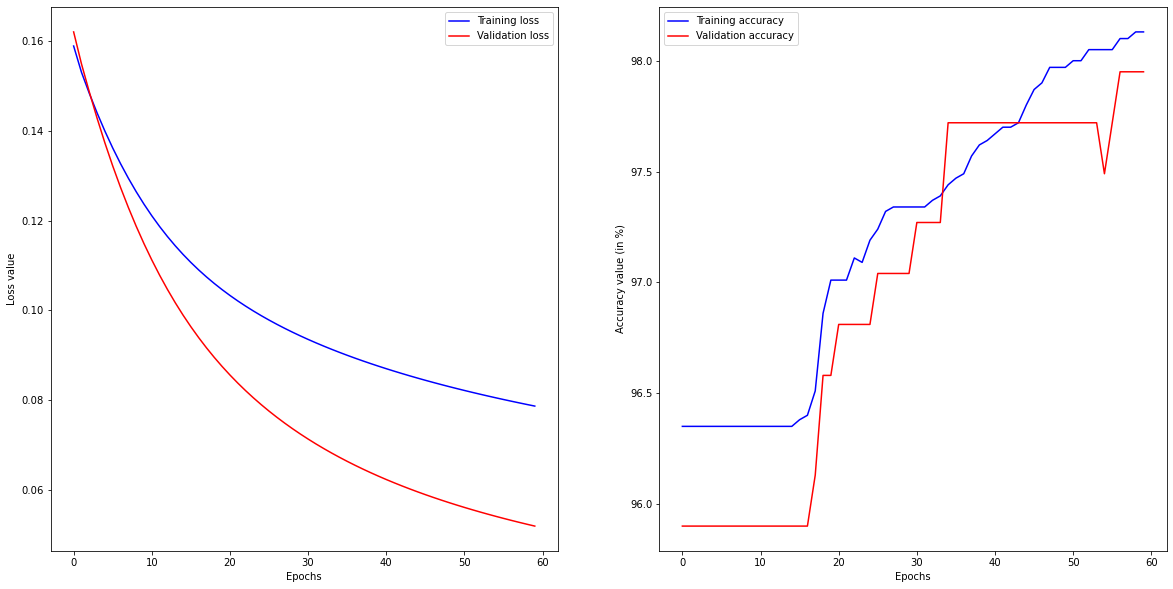

In [10]:
# Visualize training/validation loss and accuracy

visualizer(lr_loss, lr_acc, n_epochs)

## 2)- Multi Class SVM Soft Margin

In [13]:
#################### Defining the basic parameters for training the SVM Soft Margin model ###########################

# Learning rate
alpha = 0.001
# Momentum parameter for the optimizer
beta = 0.9
# Number of samples in a mini-batch
mb = 100
# Number of classes
n_class = 8
# Number of Epochs
n_epochs = 10
# Show the evolution of training
info = 1
# Number of observations authorized in the margin area
C = 1

# Training the model
svm = svm_multiclass.SVM(x_train_vect, y_train, x_test_vect, y_test,
                         alpha, beta, mb, n_class, F, C, n_epochs, info)
svm_weights, svm_loss, svm_acc = svm.train()

-------------------------------------------------- Processing class 1 --------------------------------------------------

Epoch: 0 | Duration: 4.75s | Train loss: 0.35315 | Train accuracy: 95.49% | Validation loss: 0.31917 | Validation accuracy: 95.67%
Epoch: 1 | Duration: 4.46s | Train loss: 0.33192 | Train accuracy: 95.16% | Validation loss: 0.28702 | Validation accuracy: 95.44%
Epoch: 2 | Duration: 5.47s | Train loss: 0.32428 | Train accuracy: 95.47% | Validation loss: 0.27313 | Validation accuracy: 95.9%
Epoch: 3 | Duration: 4.46s | Train loss: 0.32141 | Train accuracy: 95.7% | Validation loss: 0.26645 | Validation accuracy: 95.44%
Epoch: 4 | Duration: 5.27s | Train loss: 0.32007 | Train accuracy: 96.2% | Validation loss: 0.26259 | Validation accuracy: 95.67%
Epoch: 5 | Duration: 5.9s | Train loss: 0.31948 | Train accuracy: 95.37% | Validation loss: 0.26057 | Validation accuracy: 96.81%
Epoch: 6 | Duration: 4.42s | Train loss: 0.31921 | Train accuracy: 95.77% | Validation loss: 0.2

Epoch: 8 | Duration: 3.51s | Train loss: 0.11082 | Train accuracy: 99.11% | Validation loss: 0.0574 | Validation accuracy: 99.32%
Epoch: 9 | Duration: 3.51s | Train loss: 0.11075 | Train accuracy: 98.89% | Validation loss: 0.05734 | Validation accuracy: 99.09%
-------------------------------------------------- Processing class 7 --------------------------------------------------

Epoch: 0 | Duration: 3.4s | Train loss: 0.10096 | Train accuracy: 99.14% | Validation loss: 0.09722 | Validation accuracy: 98.41%
Epoch: 1 | Duration: 3.37s | Train loss: 0.09922 | Train accuracy: 99.19% | Validation loss: 0.0952 | Validation accuracy: 98.86%
Epoch: 2 | Duration: 3.46s | Train loss: 0.09834 | Train accuracy: 99.21% | Validation loss: 0.09396 | Validation accuracy: 98.63%
Epoch: 3 | Duration: 3.54s | Train loss: 0.09787 | Train accuracy: 99.19% | Validation loss: 0.09314 | Validation accuracy: 99.09%
Epoch: 4 | Duration: 3.61s | Train loss: 0.0976 | Train accuracy: 99.29% | Validation loss: 0.0

In [14]:
# Evaluate the model with the testing set

svm.test(svm_weights)

--------------------------------------------------
 Test accuracy is 87.78%
